<a href="https://colab.research.google.com/github/tasyasvdh09/PCVK_Genap_2023/blob/main/PCVK_Modul_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Modul 10 - Thresholding**

TASYA SEVIA ADHA / TI3D / 17 / 2041720031

In [1]:
# import folder yang ada di drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

1.) Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) secara manual

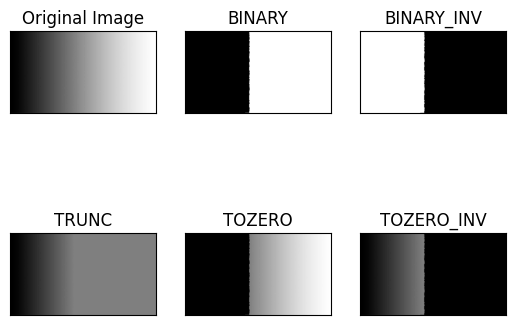

In [20]:
#input image
img = cv2.imread('/content/drive/MyDrive/PCVK/images/gradient.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

2.) Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold 
saat anda gunakan Otsu’s.

<ipython-input-21-ed8e8309ce60>:20: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb
<ipython-input-21-ed8e8309ce60>:21: RuntimeWarning: invalid value encountered in true_divide
  mf = (sumb - sumb)/wf


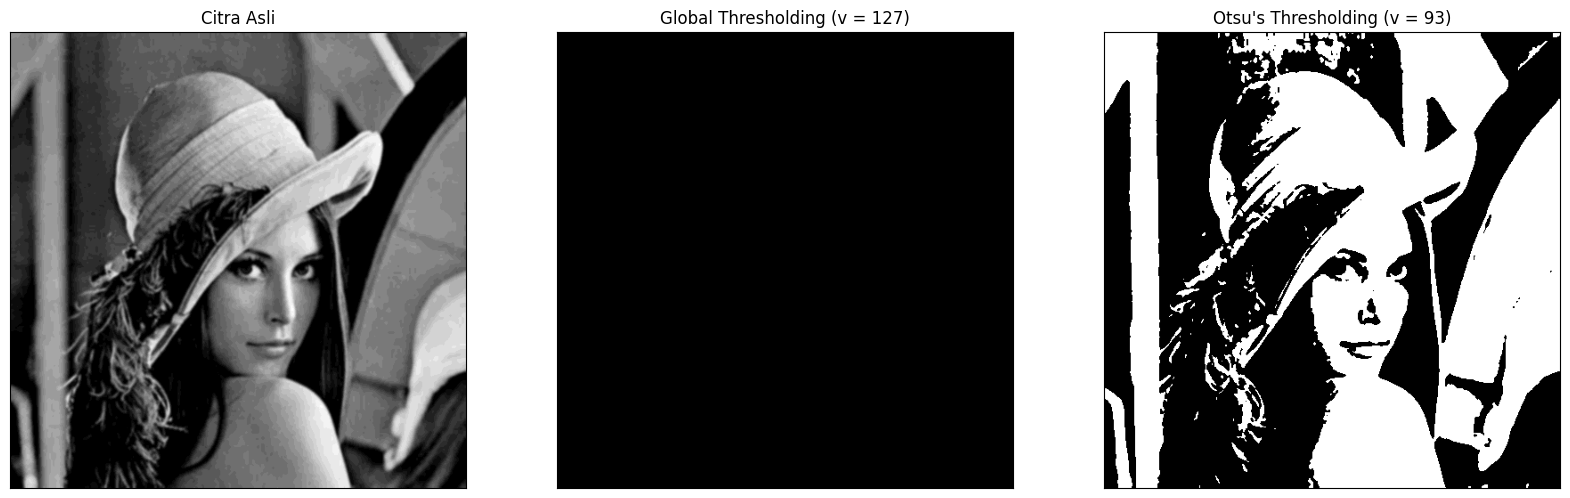

In [21]:
#input image
filename = ('/content/drive/MyDrive/PCVK/images/lena_gs_lc2.jpg')
img = cv2.imread(filename,0) 
blur = cv2. GaussianBlur (img, (5,5),0)

hist = cv2.calcHist([blur],[0],None,[256], [0,256]) 
hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1 

for i in range(0,255):
  wb += hist[i] 
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*hist[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i 

x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x] 
citra3 = [blur, th1, th2]
plt. figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()

3.) Histogram dari citra tersegmentasi, Histogram hanya pada foreground image 
saja

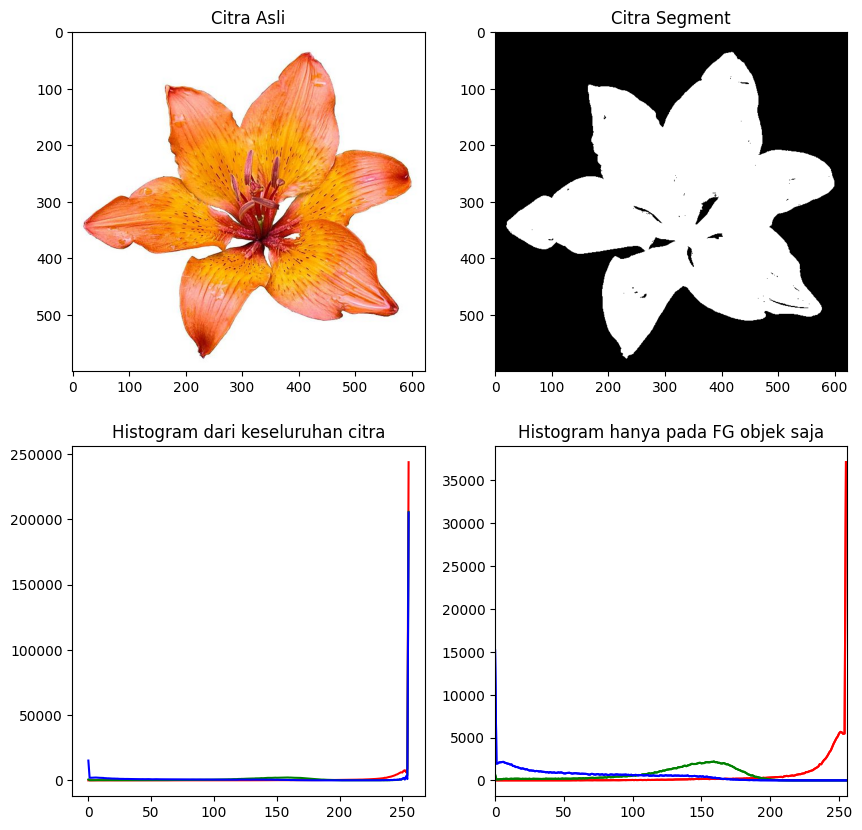

In [19]:
#input image
filename = ('/content/drive/MyDrive/PCVK/images/lily.jpg')
img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Global Thresholding
ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

4.) Segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang 
kuning saja. 

(<Axes: >, <matplotlib.image.AxesImage at 0x7fce0bf55d80>)

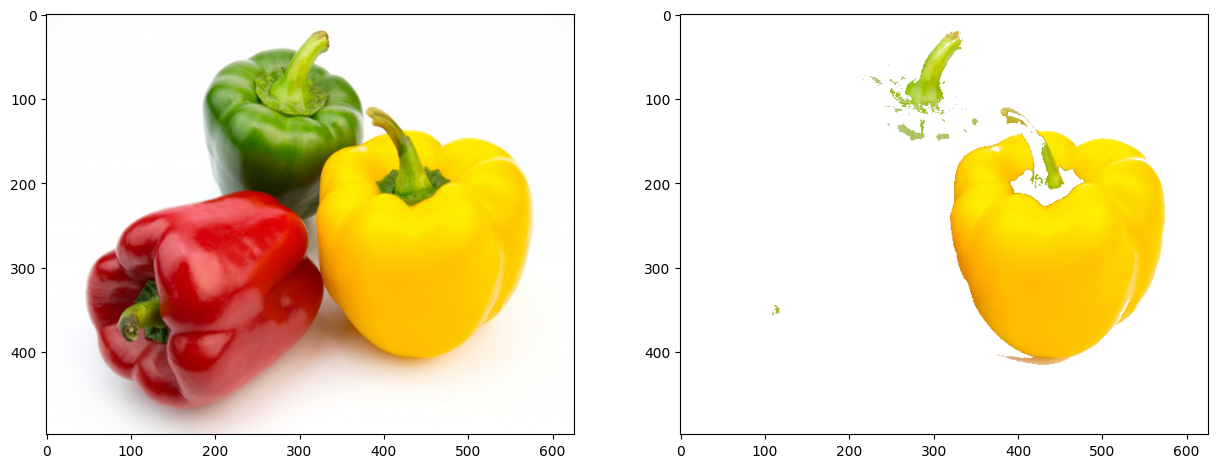

In [23]:
#input image
filename = ('/content/drive/MyDrive/PCVK/images/peppers.jpg')
img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3)) 
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3 
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()] 
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img) 
masked_image0= masked_image.reshape((-1, 3)) 
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15,12)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.subplot(2,2,2),plt.imshow(masked_image0) 

5.) Thresholding biner

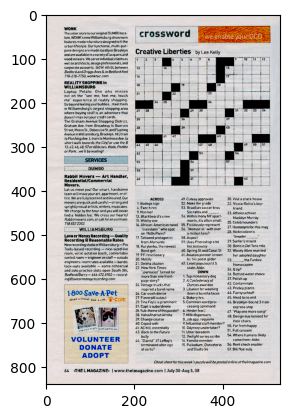

In [24]:
#input image
img_c = cv2.imread('/content/drive/MyDrive/PCVK/images/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()